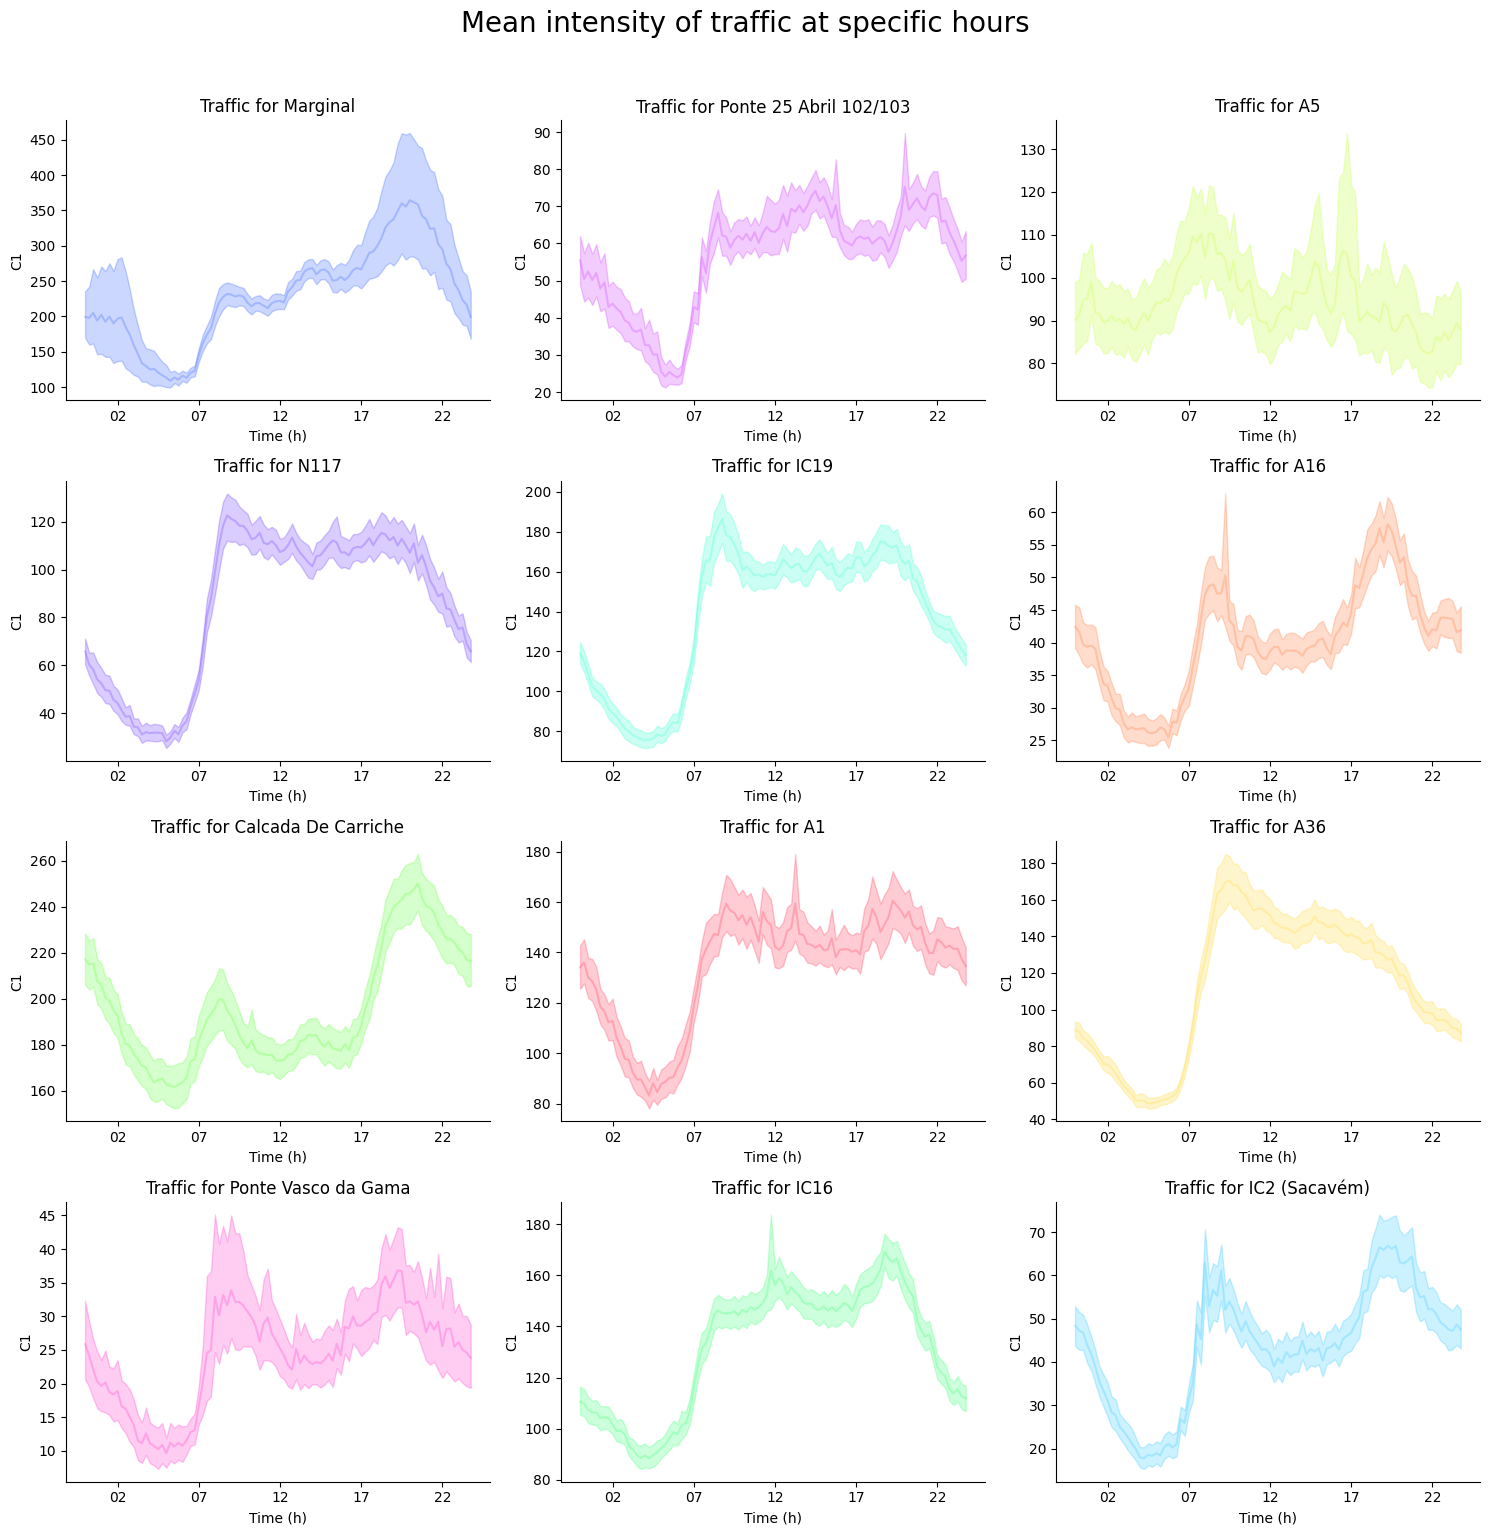

In [1]:
import cml
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import colormaps as cm
from shapely import wkt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



vodafone_data = cml.VodafoneData()
main_roads_df = vodafone_data.read('data/reduced/subset') # Read the data from the folder (All Vodafone data)
vodafone_data.preprocess(main_roads_df)

columns = ['Grid_ID', 'Datetime', 'C1', 'C2', 'C11', 'E1', 'E7', 'E8', 'E9']
main_roads_df = main_roads_df[columns]

grids_df = pd.read_csv('data/wktComplete.csv', encoding='latin-1', index_col='grelha_id')
grids_df['geometry'] = grids_df.wkt.apply(wkt.loads)
grids_geo = gpd.GeoDataFrame(grids_df) 
grids_geo.sort_index(inplace=True)
grids_geo.set_crs(epsg=4326, inplace=True)
grids_geo.to_crs(epsg=3857, inplace=True)

entrance_roads_girds_id = [value for values in cml.street_names.values() for value in values]
entrance_roads_df = main_roads_df[main_roads_df.Grid_ID.isin(entrance_roads_girds_id)].copy()
entrance_roads_df.describe()


def assign_street_name(grid_id):
    for street, grid_ids in cml.street_names.items():
        if grid_id in grid_ids:
            return street
    return None

def cmap_to_dict(cmap, categories):
    return {category: cmap(i) for category, i in zip(categories, np.linspace(0, 1, len(categories)))}

grids_geo['street_name'] = grids_geo.index.map(assign_street_name)
grids_geo['street_name'] = grids_geo['street_name'].astype('category')
main_streets_grids_geo = grids_geo[grids_geo.street_name.notna()]
streets_cmap_name = 'gist_rainbow'
streets_cmap = cm.get_cmap(streets_cmap_name)
streets_cmap_dict = cmap_to_dict(streets_cmap, main_streets_grids_geo.street_name.cat.categories)

entrance_roads_df['street_name'] = entrance_roads_df.Grid_ID.map(assign_street_name)
entrance_roads_df['hour'] = entrance_roads_df.Datetime.dt.hour
entrance_roads_df['minute'] = entrance_roads_df.Datetime.dt.minute

# Get unique street names
street_names = entrance_roads_df['street_name'].unique()
num_subplots = len(street_names)
num_rows = num_subplots // 3 + (num_subplots % 3 > 0)
num_cols = min(num_subplots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle('Mean intensity of traffic at specific hours', fontsize=20, y=1.02)

# Plot separately for each street name
for ax, street_name in zip(axes.flatten(), street_names):
    street_df = entrance_roads_df[entrance_roads_df['street_name'] == street_name].copy()
    street_df.set_index('Datetime', inplace=True)
    street_df = street_df.resample('15T')[['C1']].mean()
    street_df['time'] = pd.to_datetime(street_df.index.time, format='%H:%M:%S')
    sns.lineplot(x='time', y='C1', data=street_df, legend=True, c=streets_cmap_dict[street_name], ax=ax, alpha=0.2)
    ax.set_xlabel('Time (h)')
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    sns.despine()
    ax.set_title(f'Traffic for {street_name}')

plt.tight_layout()
plt.show()

Epoch [100/2000], Loss: 0.005182407330721617
Epoch [200/2000], Loss: 0.004082892090082169
Epoch [300/2000], Loss: 0.0019817939028143883
Epoch [400/2000], Loss: 0.0014507583109661937
Epoch [500/2000], Loss: 0.0011703696800395846
Epoch [600/2000], Loss: 0.0009049939690157771
Epoch [700/2000], Loss: 0.0007066295365802944
Epoch [800/2000], Loss: 0.0005437340005300939
Epoch [900/2000], Loss: 0.0004731115186586976
Epoch [1000/2000], Loss: 0.00043315489892847836
Epoch [1100/2000], Loss: 0.000397674972191453
Epoch [1200/2000], Loss: 0.0003687479766085744
Epoch [1300/2000], Loss: 0.000344856089213863
Epoch [1400/2000], Loss: 0.00033653227728791535
Epoch [1500/2000], Loss: 0.00030869620968587697
Epoch [1600/2000], Loss: 0.0002922238199971616
Epoch [1700/2000], Loss: 0.000278077699476853
Epoch [1800/2000], Loss: 0.000265344453509897
Epoch [1900/2000], Loss: 0.0002552879450377077
Epoch [2000/2000], Loss: 0.0002447760198265314
Street: Marginal
LSTM Model - Average Mean Absolute Error (MAE): 38.4388

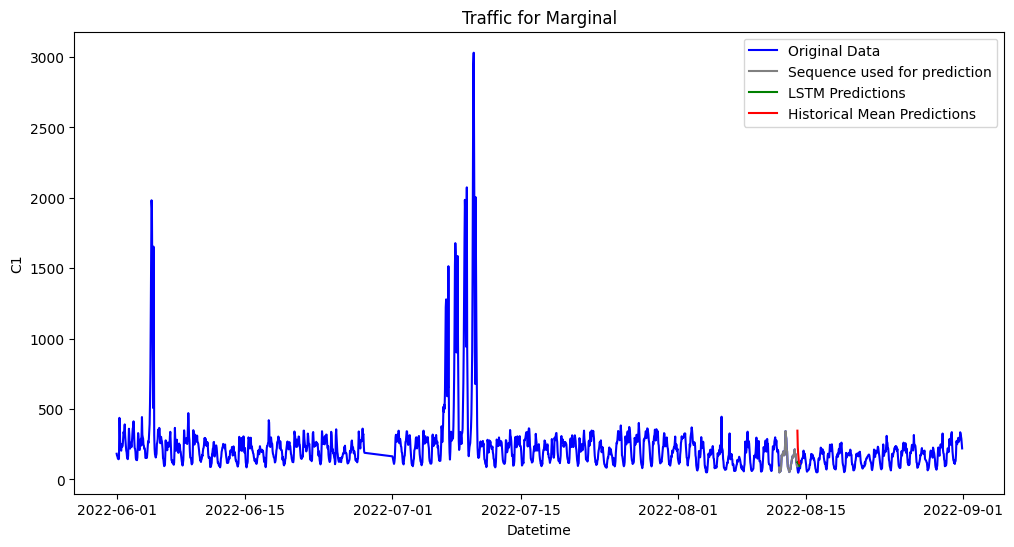

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


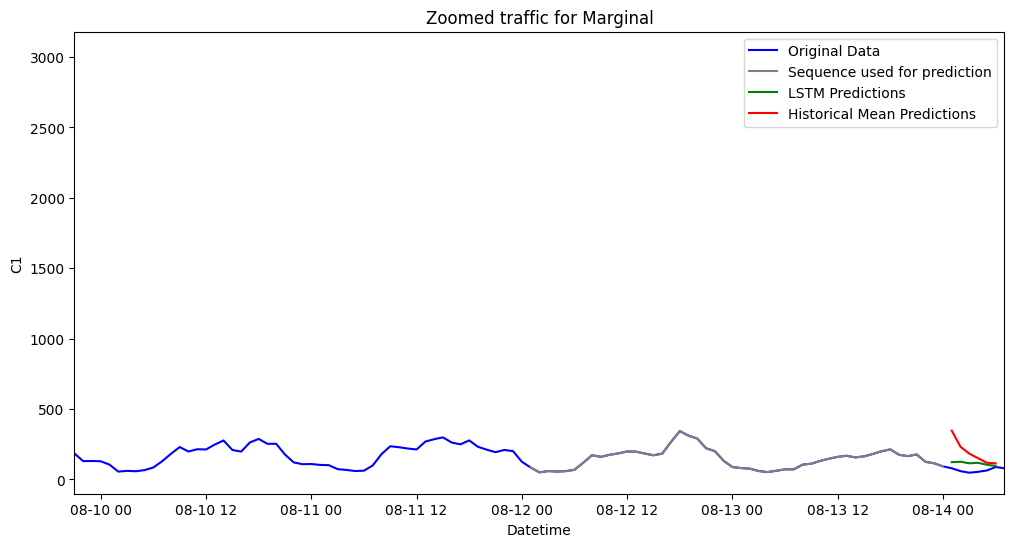

Epoch [100/2000], Loss: 0.005106637720018625
Epoch [200/2000], Loss: 0.004590472672134638
Epoch [300/2000], Loss: 0.003820577869191766
Epoch [400/2000], Loss: 0.0032332008704543114
Epoch [500/2000], Loss: 0.0028830538503825665
Epoch [600/2000], Loss: 0.002682501683011651
Epoch [700/2000], Loss: 0.002594993682578206
Epoch [800/2000], Loss: 0.002562643028795719
Epoch [900/2000], Loss: 0.0025365266483277082
Epoch [1000/2000], Loss: 0.0025152263697236776
Epoch [1100/2000], Loss: 0.00249379756860435
Epoch [1200/2000], Loss: 0.0024574189446866512
Epoch [1300/2000], Loss: 0.0024245178792625666
Epoch [1400/2000], Loss: 0.0023976964876055717
Epoch [1500/2000], Loss: 0.0023733777925372124
Epoch [1600/2000], Loss: 0.0024779776576906443
Epoch [1700/2000], Loss: 0.002318156650289893
Epoch [1800/2000], Loss: 0.0022877019364386797
Epoch [1900/2000], Loss: 0.0022624479606747627
Epoch [2000/2000], Loss: 0.002237098990008235
Street: Ponte 25 Abril 102/103
LSTM Model - Average Mean Absolute Error (MAE): 

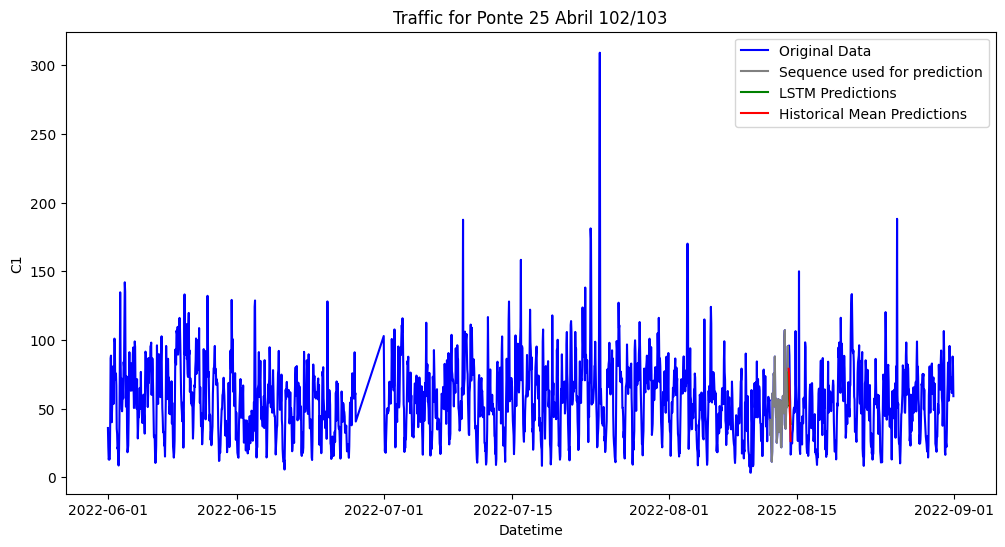

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


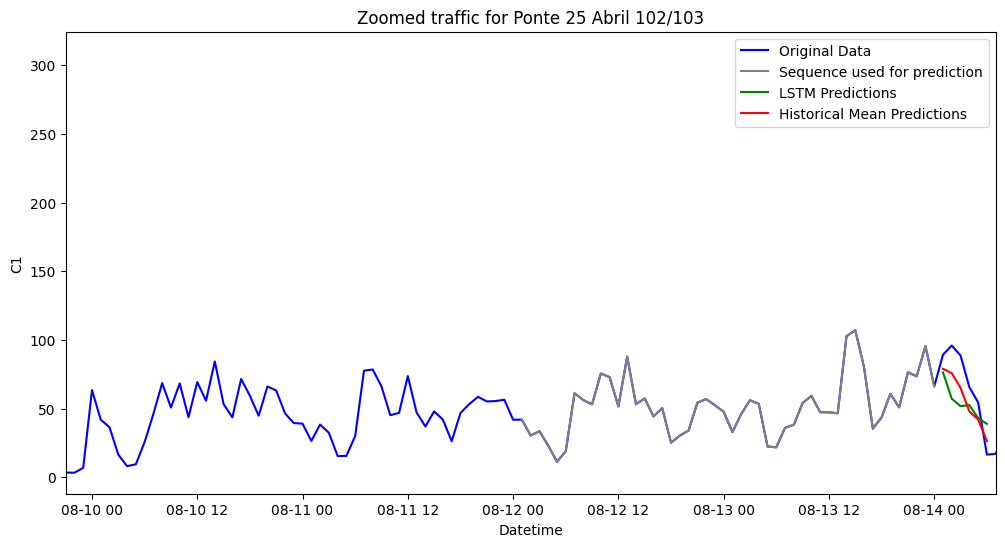

Epoch [100/2000], Loss: 0.003348624799400568
Epoch [200/2000], Loss: 0.0030800970271229744
Epoch [300/2000], Loss: 0.002794071100652218
Epoch [400/2000], Loss: 0.0020289237145334482
Epoch [500/2000], Loss: 0.0017909863963723183
Epoch [600/2000], Loss: 0.0016759342979639769
Epoch [700/2000], Loss: 0.001590654836036265
Epoch [800/2000], Loss: 0.00151979795191437
Epoch [900/2000], Loss: 0.0014603511663153768
Epoch [1000/2000], Loss: 0.001417689141817391
Epoch [1100/2000], Loss: 0.0013922738144174218
Epoch [1200/2000], Loss: 0.0013782301684841514
Epoch [1300/2000], Loss: 0.001368900528177619
Epoch [1400/2000], Loss: 0.001361078699119389
Epoch [1500/2000], Loss: 0.0013532248558476567
Epoch [1600/2000], Loss: 0.0013450479600578547
Epoch [1700/2000], Loss: 0.0013475681189447641
Epoch [1800/2000], Loss: 0.0013264288427308202
Epoch [1900/2000], Loss: 0.0013161578681319952
Epoch [2000/2000], Loss: 0.0013047829270362854
Street: A5
LSTM Model - Average Mean Absolute Error (MAE): 25.934839690375934

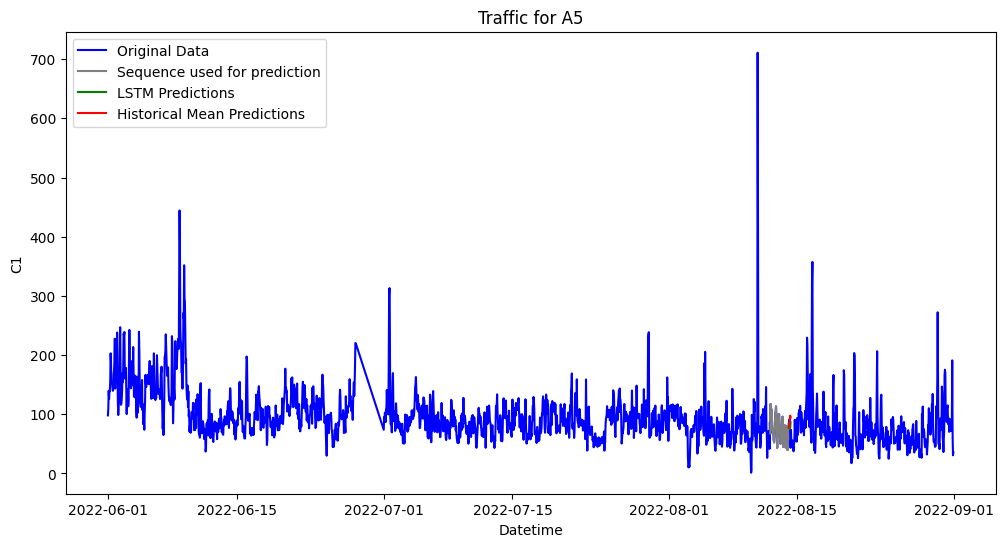

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


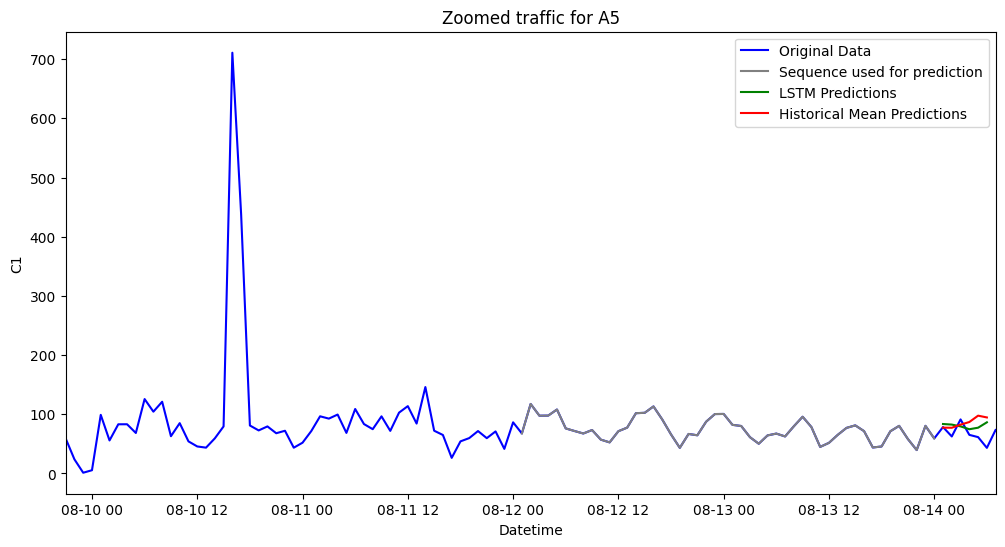

Epoch [100/2000], Loss: 0.01104887668043375
Epoch [200/2000], Loss: 0.009610981680452824
Epoch [300/2000], Loss: 0.00682888412848115
Epoch [400/2000], Loss: 0.005501094739884138
Epoch [500/2000], Loss: 0.004504779819399118
Epoch [600/2000], Loss: 0.004121891688555479
Epoch [700/2000], Loss: 0.0038989230524748564
Epoch [800/2000], Loss: 0.003796806326135993
Epoch [900/2000], Loss: 0.003670638892799616
Epoch [1000/2000], Loss: 0.0036084444727748632
Epoch [1100/2000], Loss: 0.003558879718184471
Epoch [1200/2000], Loss: 0.003512564580887556
Epoch [1300/2000], Loss: 0.0034649157896637917
Epoch [1400/2000], Loss: 0.0034163324162364006
Epoch [1500/2000], Loss: 0.0033679858315736055
Epoch [1600/2000], Loss: 0.003341605653986335
Epoch [1700/2000], Loss: 0.0032812654972076416
Epoch [1800/2000], Loss: 0.0032745865173637867
Epoch [1900/2000], Loss: 0.0031836924608796835
Epoch [2000/2000], Loss: 0.00313479988835752
Street: N117
LSTM Model - Average Mean Absolute Error (MAE): 15.330986488845612
LSTM

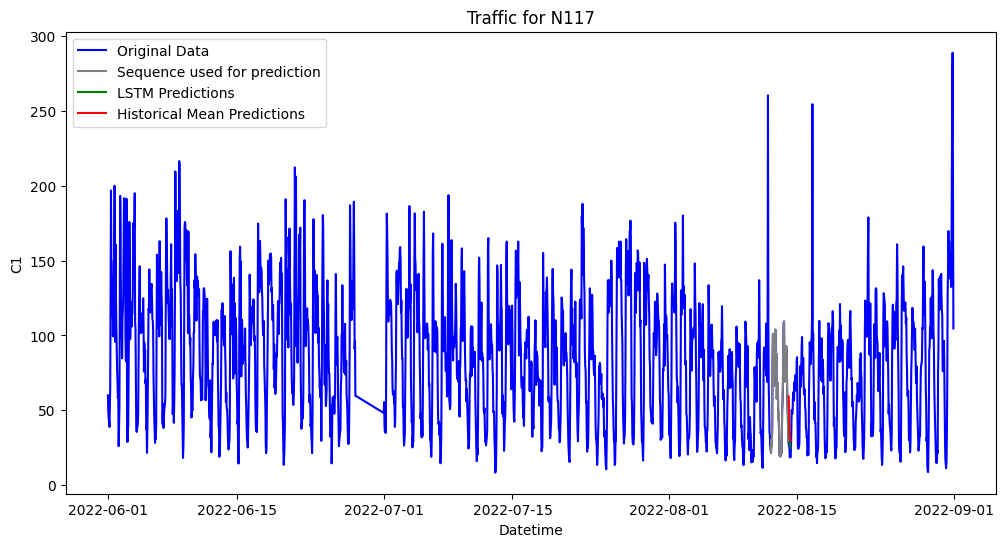

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


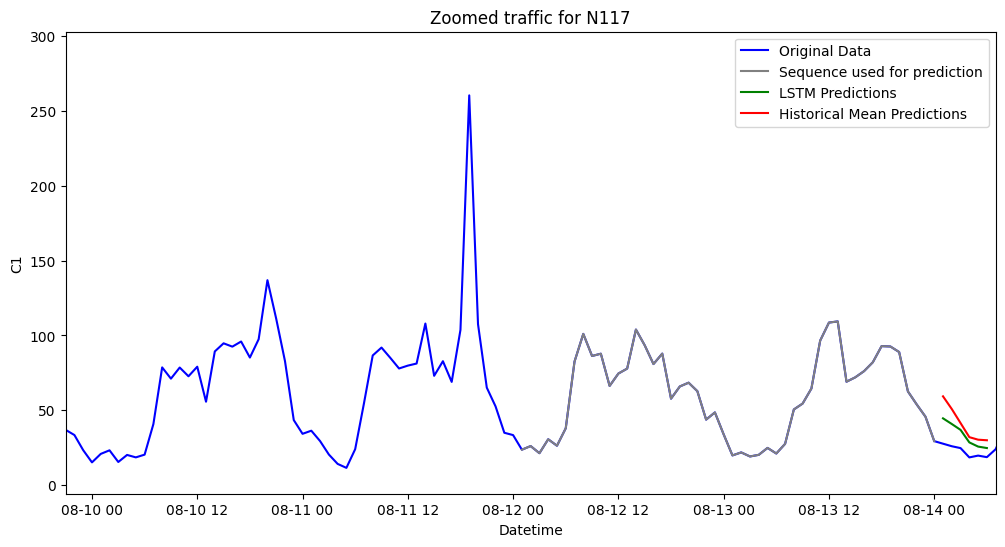

Epoch [100/2000], Loss: 0.01947714388370514
Epoch [200/2000], Loss: 0.016451852396130562
Epoch [300/2000], Loss: 0.014978145249187946
Epoch [400/2000], Loss: 0.013515821658074856
Epoch [500/2000], Loss: 0.009215783327817917
Epoch [600/2000], Loss: 0.006845215801149607
Epoch [700/2000], Loss: 0.006067836191505194
Epoch [800/2000], Loss: 0.005535176955163479
Epoch [900/2000], Loss: 0.0051505169831216335
Epoch [1000/2000], Loss: 0.004870923236012459
Epoch [1100/2000], Loss: 0.004680465906858444
Epoch [1200/2000], Loss: 0.0045357681810855865
Epoch [1300/2000], Loss: 0.004436920862644911
Epoch [1400/2000], Loss: 0.0043561109341681
Epoch [1500/2000], Loss: 0.004287462215870619
Epoch [1600/2000], Loss: 0.0042299241758883
Epoch [1700/2000], Loss: 0.004219832364469767
Epoch [1800/2000], Loss: 0.004145262762904167
Epoch [1900/2000], Loss: 0.0041482169181108475
Epoch [2000/2000], Loss: 0.00406981073319912
Street: IC19
LSTM Model - Average Mean Absolute Error (MAE): 16.84418030291162
LSTM Model - 

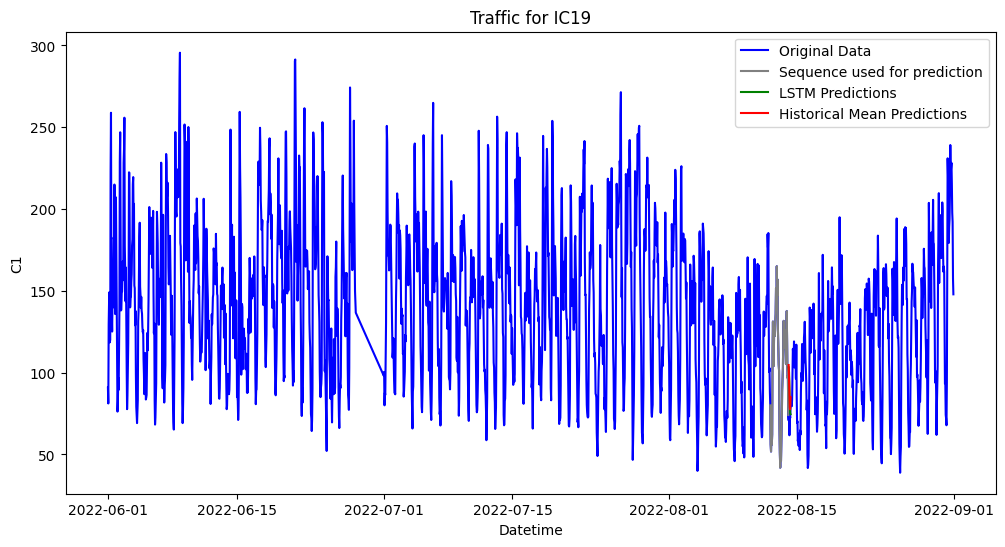

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


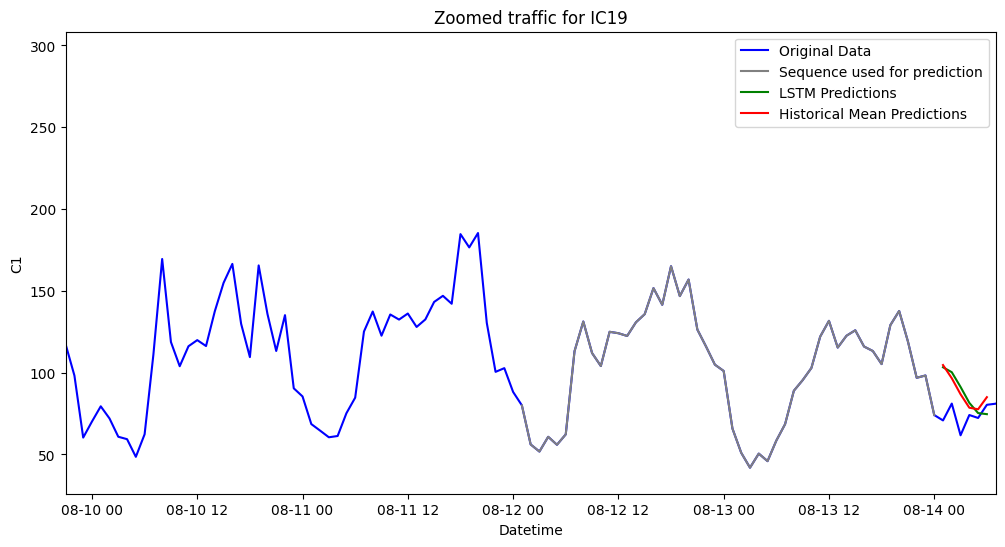

Epoch [100/2000], Loss: 0.006143168080598116
Epoch [200/2000], Loss: 0.005743502639234066
Epoch [300/2000], Loss: 0.005587306339293718
Epoch [400/2000], Loss: 0.005446186754852533
Epoch [500/2000], Loss: 0.005290892440825701
Epoch [600/2000], Loss: 0.005131951533257961
Epoch [700/2000], Loss: 0.004944468382745981
Epoch [800/2000], Loss: 0.004711078479886055
Epoch [900/2000], Loss: 0.004427375737577677
Epoch [1000/2000], Loss: 0.004113644827157259
Epoch [1100/2000], Loss: 0.003873453475534916
Epoch [1200/2000], Loss: 0.0036924181040376425
Epoch [1300/2000], Loss: 0.0035519679076969624
Epoch [1400/2000], Loss: 0.0034370720386505127
Epoch [1500/2000], Loss: 0.0033279284834861755
Epoch [1600/2000], Loss: 0.003225089283660054
Epoch [1700/2000], Loss: 0.0031388881616294384
Epoch [1800/2000], Loss: 0.003069769125431776
Epoch [1900/2000], Loss: 0.003013690933585167
Epoch [2000/2000], Loss: 0.0029661895241588354
Street: A16
LSTM Model - Average Mean Absolute Error (MAE): 8.8916330414852
LSTM Mo

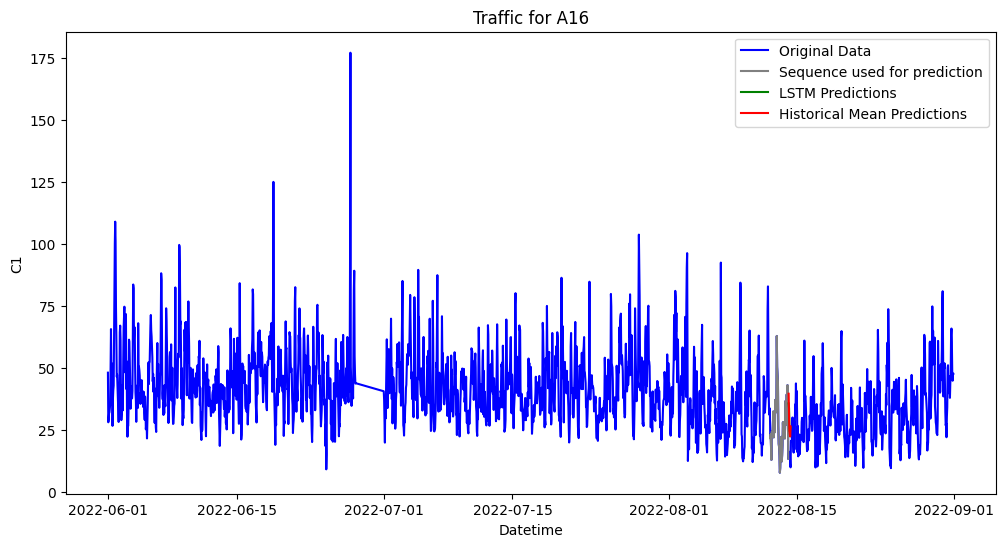

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


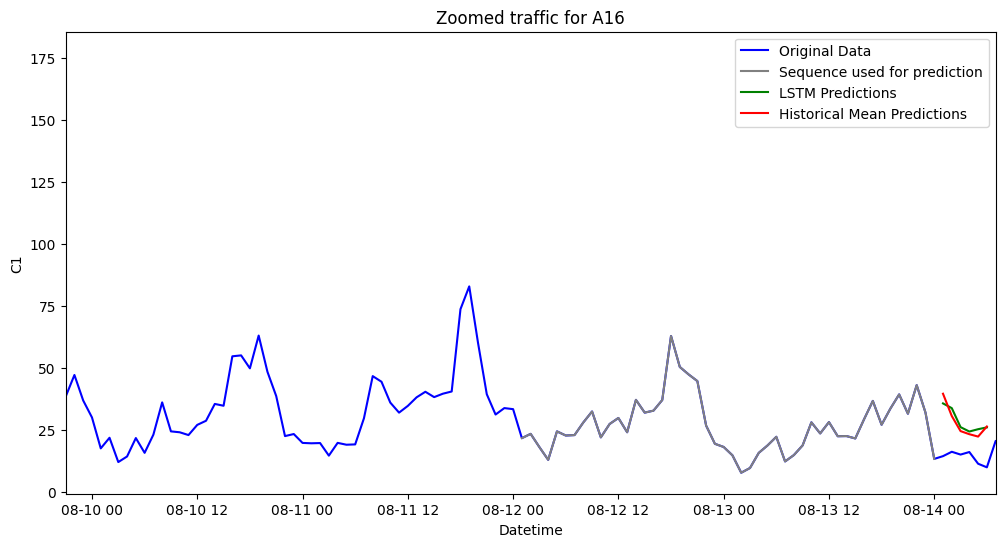

Epoch [100/2000], Loss: 0.018329111859202385
Epoch [200/2000], Loss: 0.016418108716607094
Epoch [300/2000], Loss: 0.01435620803385973
Epoch [400/2000], Loss: 0.008825683034956455
Epoch [500/2000], Loss: 0.007376483641564846
Epoch [600/2000], Loss: 0.006575204897671938
Epoch [700/2000], Loss: 0.005778573919087648
Epoch [800/2000], Loss: 0.0050187078304588795
Epoch [900/2000], Loss: 0.0045519922859966755
Epoch [1000/2000], Loss: 0.0041397265158593655
Epoch [1100/2000], Loss: 0.003817250020802021
Epoch [1200/2000], Loss: 0.0035291966050863266
Epoch [1300/2000], Loss: 0.003217375837266445
Epoch [1400/2000], Loss: 0.0029711758252233267
Epoch [1500/2000], Loss: 0.0028116824105381966
Epoch [1600/2000], Loss: 0.002690569031983614
Epoch [1700/2000], Loss: 0.0025973301380872726
Epoch [1800/2000], Loss: 0.0025190955493599176
Epoch [1900/2000], Loss: 0.00244706217199564
Epoch [2000/2000], Loss: 0.002398688578978181
Street: Calcada De Carriche
LSTM Model - Average Mean Absolute Error (MAE): 18.9223

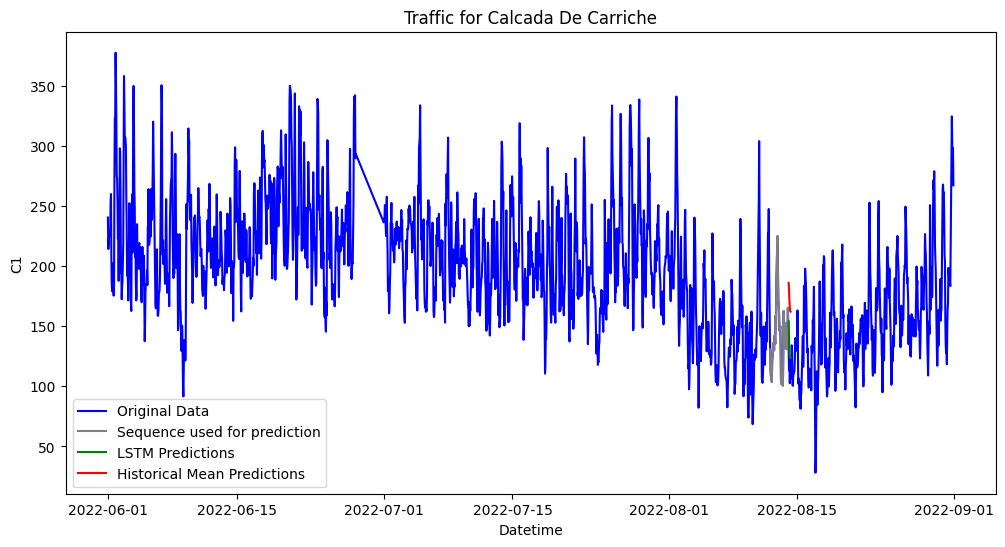

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


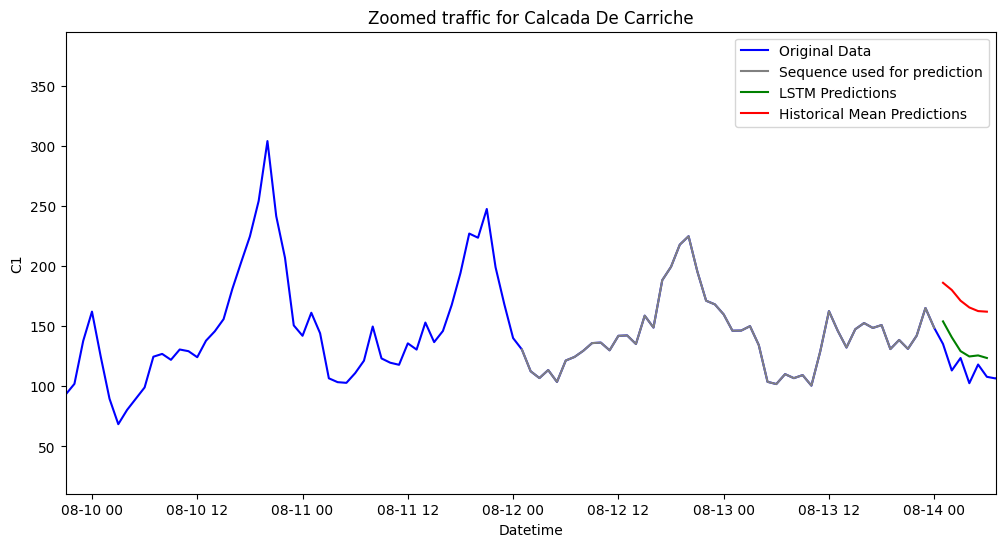

Epoch [100/2000], Loss: 0.007375613320618868
Epoch [200/2000], Loss: 0.00632057711482048
Epoch [300/2000], Loss: 0.005362772848457098
Epoch [400/2000], Loss: 0.004816445522010326
Epoch [500/2000], Loss: 0.004310291726142168
Epoch [600/2000], Loss: 0.004033747594803572
Epoch [700/2000], Loss: 0.0038926175329834223
Epoch [800/2000], Loss: 0.0038134888745844364
Epoch [900/2000], Loss: 0.003766310401260853
Epoch [1000/2000], Loss: 0.00373262376524508
Epoch [1100/2000], Loss: 0.0037170599680393934
Epoch [1200/2000], Loss: 0.003674214705824852
Epoch [1300/2000], Loss: 0.003665170632302761
Epoch [1400/2000], Loss: 0.003630727995187044
Epoch [1500/2000], Loss: 0.0035984257701784372
Epoch [1600/2000], Loss: 0.0035760770551860332
Epoch [1700/2000], Loss: 0.003548704320564866
Epoch [1800/2000], Loss: 0.0035356078296899796
Epoch [1900/2000], Loss: 0.0035057668574154377
Epoch [2000/2000], Loss: 0.0035068595316261053
Street: A1
LSTM Model - Average Mean Absolute Error (MAE): 24.899522357243065
LSTM 

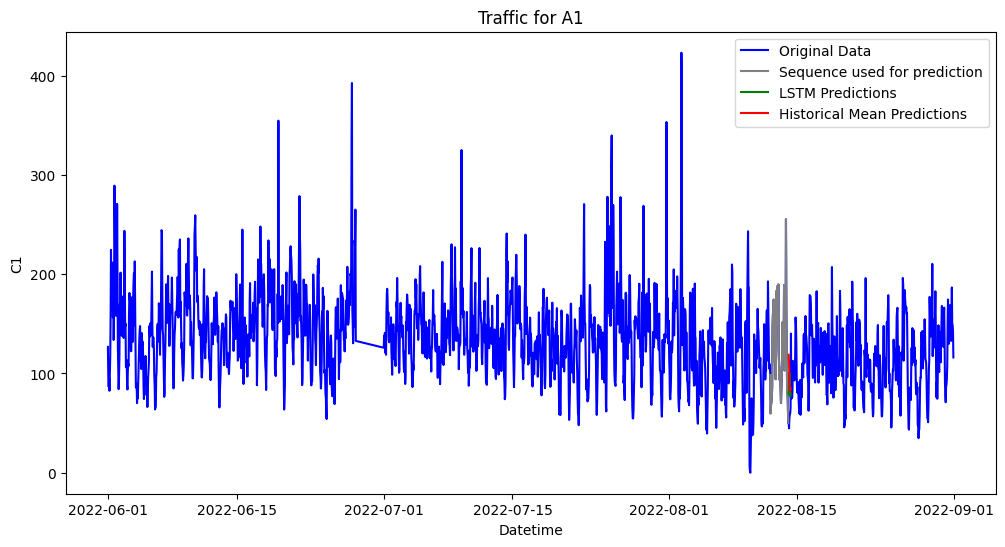

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


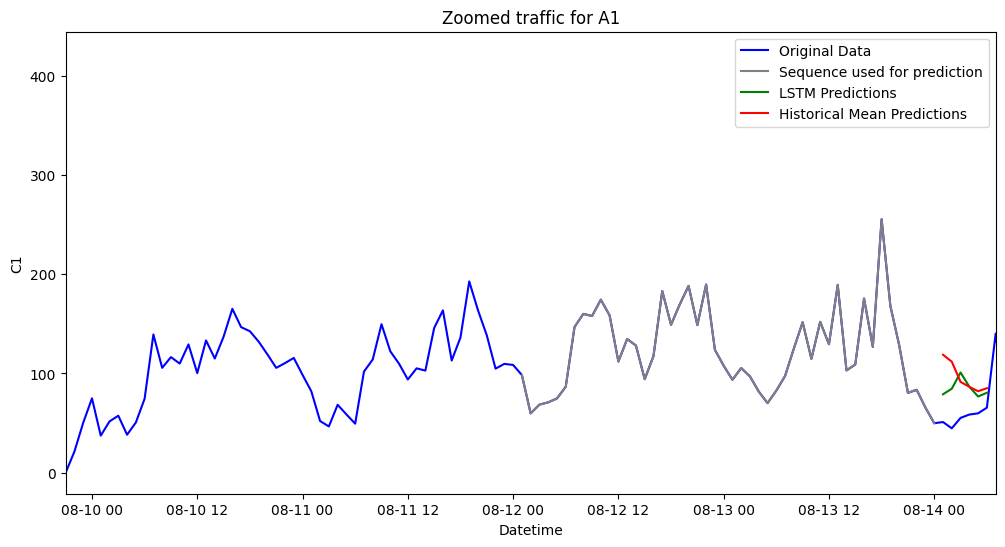

Epoch [100/2000], Loss: 0.01344431471079588
Epoch [200/2000], Loss: 0.010535357519984245
Epoch [300/2000], Loss: 0.009027767926454544
Epoch [400/2000], Loss: 0.007506371010094881
Epoch [500/2000], Loss: 0.006154864560812712
Epoch [600/2000], Loss: 0.005082085262984037
Epoch [700/2000], Loss: 0.0044302321039140224
Epoch [800/2000], Loss: 0.003951940219849348
Epoch [900/2000], Loss: 0.003585902974009514
Epoch [1000/2000], Loss: 0.0033500278368592262
Epoch [1100/2000], Loss: 0.003180536674335599
Epoch [1200/2000], Loss: 0.00305268750526011
Epoch [1300/2000], Loss: 0.002952923998236656
Epoch [1400/2000], Loss: 0.0028738549444824457
Epoch [1500/2000], Loss: 0.0028101259376853704
Epoch [1600/2000], Loss: 0.0027611057739704847
Epoch [1700/2000], Loss: 0.002723272191360593
Epoch [1800/2000], Loss: 0.002694553229957819
Epoch [1900/2000], Loss: 0.0026717931032180786
Epoch [2000/2000], Loss: 0.0026506702415645123
Street: A36
LSTM Model - Average Mean Absolute Error (MAE): 17.45757245925935
LSTM M

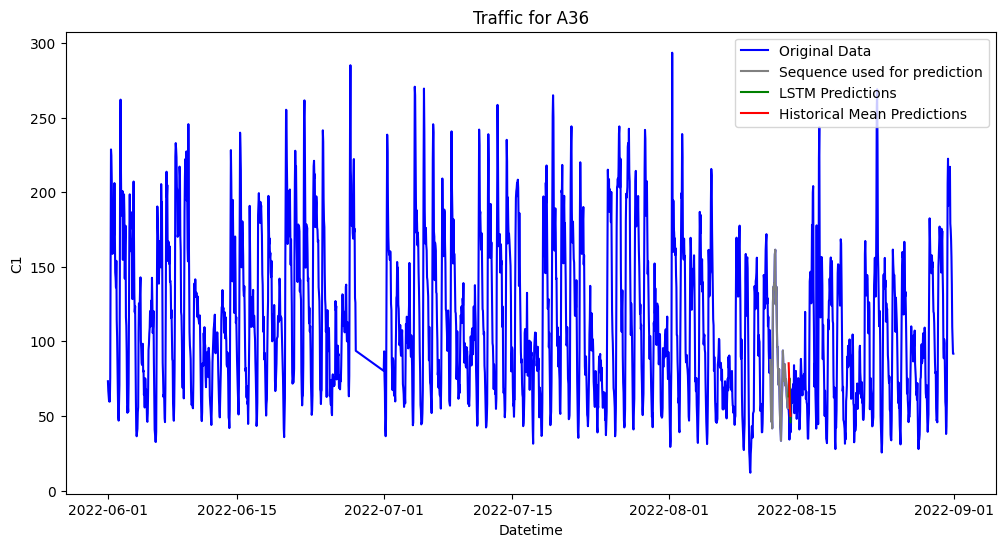

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


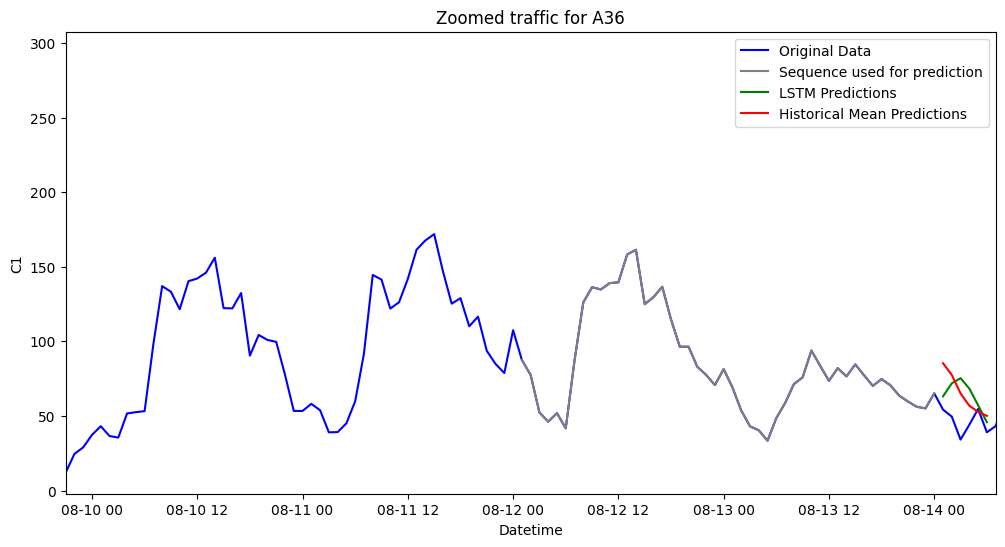

Epoch [100/2000], Loss: 0.0036371226888149977
Epoch [200/2000], Loss: 0.0033766923006623983
Epoch [300/2000], Loss: 0.0031212472822517157
Epoch [400/2000], Loss: 0.002780134556815028
Epoch [500/2000], Loss: 0.0017938442761078477
Epoch [600/2000], Loss: 0.0016960379434749484
Epoch [700/2000], Loss: 0.0016121880616992712
Epoch [800/2000], Loss: 0.0015153256244957447
Epoch [900/2000], Loss: 0.001360586378723383
Epoch [1000/2000], Loss: 0.0010973047465085983
Epoch [1100/2000], Loss: 0.0009116498404182494
Epoch [1200/2000], Loss: 0.0008123982115648687
Epoch [1300/2000], Loss: 0.0007579281227663159
Epoch [1400/2000], Loss: 0.0007273509982042015
Epoch [1500/2000], Loss: 0.0007019635522738099
Epoch [1600/2000], Loss: 0.0006818767287768424
Epoch [1700/2000], Loss: 0.0006668533314950764
Epoch [1800/2000], Loss: 0.0006593276048079133
Epoch [1900/2000], Loss: 0.0006478819414041936
Epoch [2000/2000], Loss: 0.0006400466663762927
Street: Ponte Vasco da Gama
LSTM Model - Average Mean Absolute Error (M

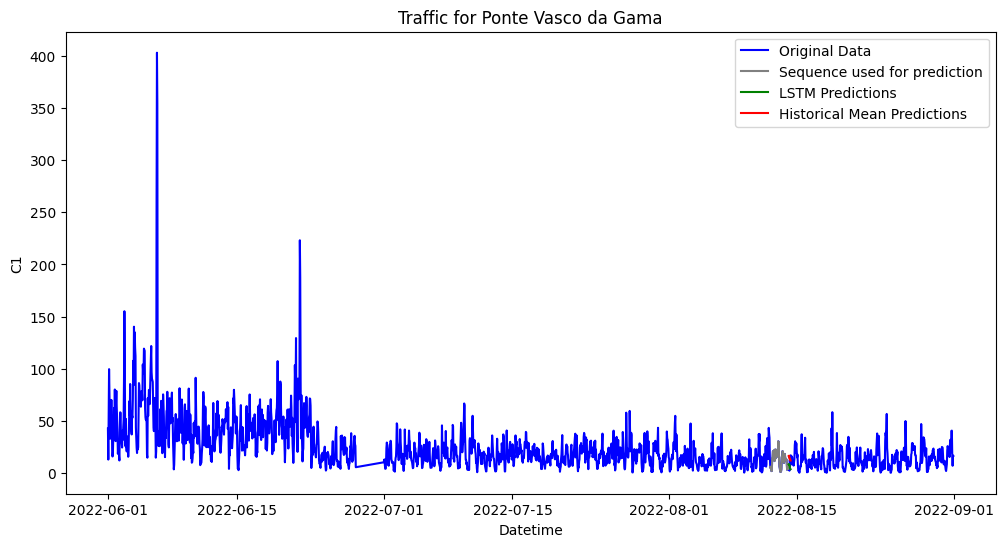

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


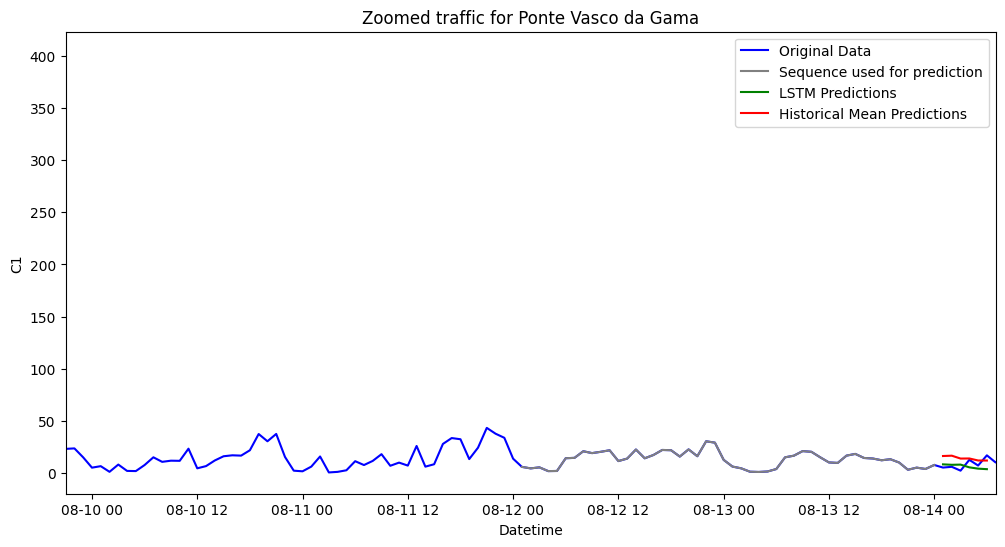

Epoch [100/2000], Loss: 0.007707491051405668
Epoch [200/2000], Loss: 0.006672614719718695
Epoch [300/2000], Loss: 0.004988071508705616
Epoch [400/2000], Loss: 0.00431467592716217
Epoch [500/2000], Loss: 0.0037855939008295536
Epoch [600/2000], Loss: 0.003559439443051815
Epoch [700/2000], Loss: 0.0034044815693050623
Epoch [800/2000], Loss: 0.0033073495142161846
Epoch [900/2000], Loss: 0.003220862243324518
Epoch [1000/2000], Loss: 0.003136333776637912
Epoch [1100/2000], Loss: 0.003086102893576026
Epoch [1200/2000], Loss: 0.003026992315426469
Epoch [1300/2000], Loss: 0.0030028235632926226
Epoch [1400/2000], Loss: 0.0029524746350944042
Epoch [1500/2000], Loss: 0.0029625704046338797
Epoch [1600/2000], Loss: 0.0028897468000650406
Epoch [1700/2000], Loss: 0.002864934504032135
Epoch [1800/2000], Loss: 0.0028461504261940718
Epoch [1900/2000], Loss: 0.0028001710306853056
Epoch [2000/2000], Loss: 0.0027656471356749535
Street: IC16
LSTM Model - Average Mean Absolute Error (MAE): 17.65534998862433
L

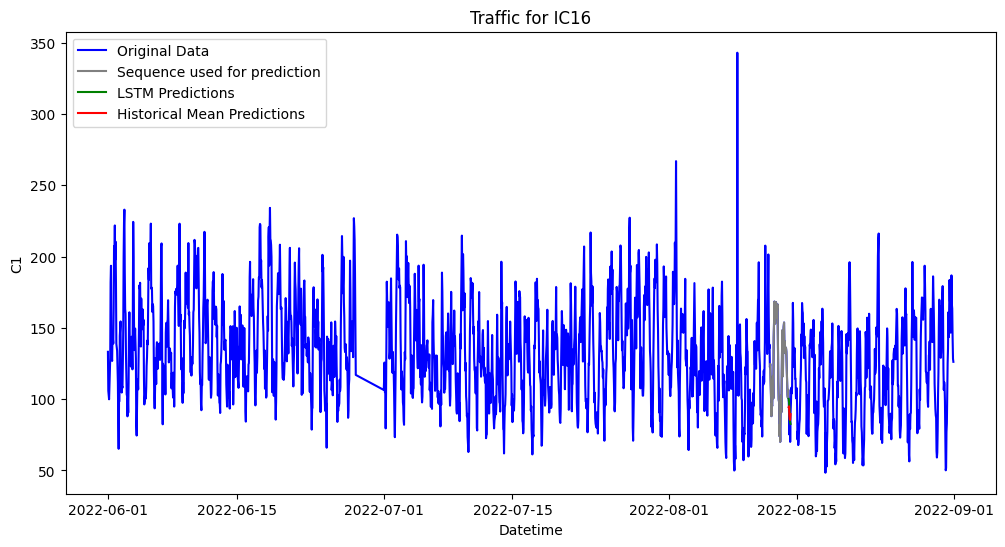

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


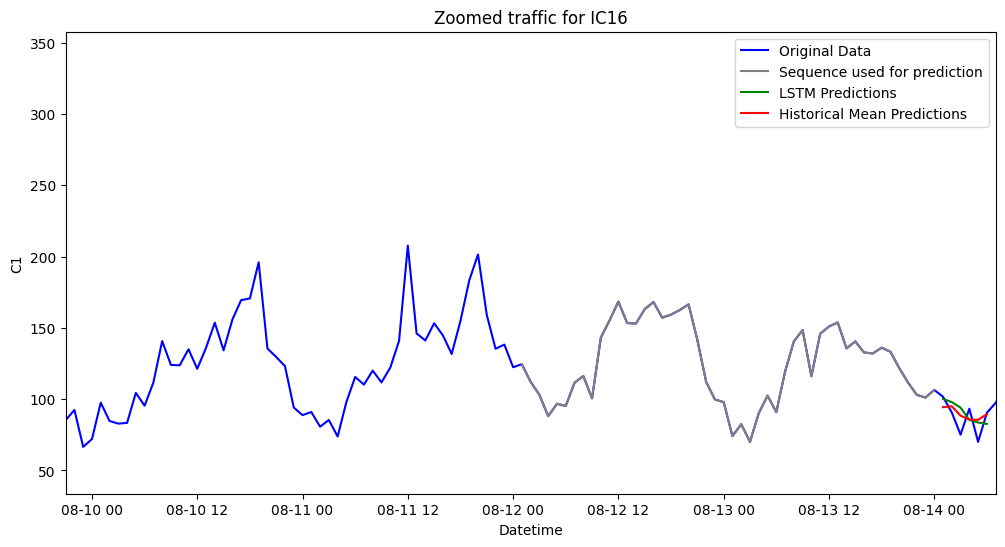

Epoch [100/2000], Loss: 0.010594290681183338
Epoch [200/2000], Loss: 0.005644005723297596
Epoch [300/2000], Loss: 0.00460352748632431
Epoch [400/2000], Loss: 0.00415653083473444
Epoch [500/2000], Loss: 0.003838916076347232
Epoch [600/2000], Loss: 0.0037285855505615473
Epoch [700/2000], Loss: 0.003672556485980749
Epoch [800/2000], Loss: 0.0035902683157473803
Epoch [900/2000], Loss: 0.0035103147383779287
Epoch [1000/2000], Loss: 0.0034575993195176125
Epoch [1100/2000], Loss: 0.003401770954951644
Epoch [1200/2000], Loss: 0.003318915842100978
Epoch [1300/2000], Loss: 0.003273765556514263
Epoch [1400/2000], Loss: 0.0032294539269059896
Epoch [1500/2000], Loss: 0.00315750390291214
Epoch [1600/2000], Loss: 0.003050091676414013
Epoch [1700/2000], Loss: 0.003010885091498494
Epoch [1800/2000], Loss: 0.002996277529746294
Epoch [1900/2000], Loss: 0.0029604346491396427
Epoch [2000/2000], Loss: 0.002905751345679164
Street: IC2 (Sacavém)
LSTM Model - Average Mean Absolute Error (MAE): 10.2834229433937

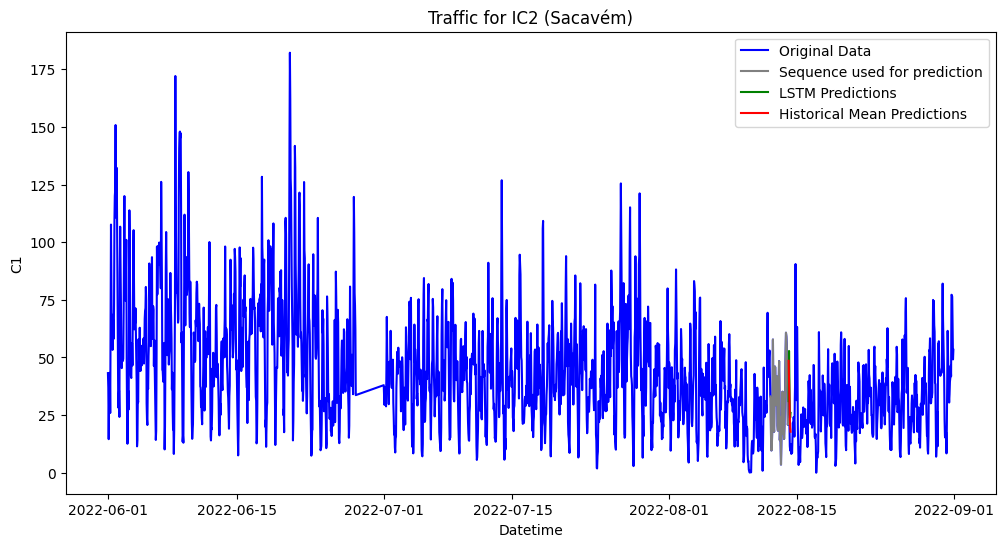

/tmp/ipykernel_6318/3638499146.py:191: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])


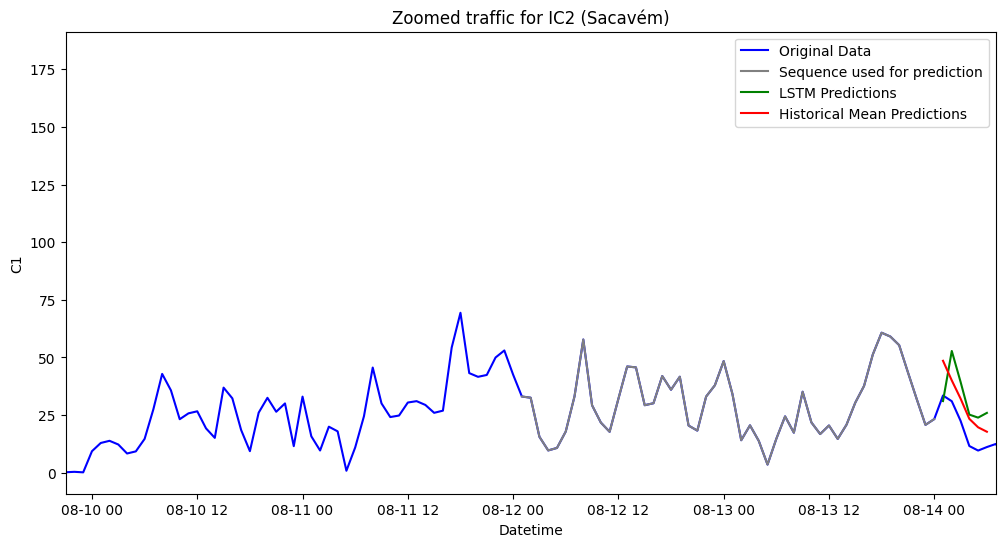

LSTM MAE: Mean = 17.907020725649442, Std = 8.368852411417558
LSTM RMSE: Mean = 20.912437647035773, Std = 9.515860190398167
Historical Mean MAE: Mean = 26.135253448324196, Std = 15.975170227954019
Historical Mean RMSE: Mean = 33.0089604810972, Std = 21.8891725410315


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define model parameters
INPUT_SIZE = 3
HIDDEN_SIZE = 30
OUTPUT_SIZE = 1  # Predicting one value (C1)
SEQUENCE_LENGTH = 48
NUM_EPOCHS = 2000
LEARNING_RATE = 0.001
TEST_SIZE = 0.2
RANDOM_STATE = 42
FUTURE = 6



class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


def calculate_historical_mean(df):
    # Group by DayOfWeek and Hour, and calculate the mean of C1
    historical_mean = df.groupby(['DayOfWeek', 'Hour'])['C1'].mean()

    # Map the historical mean to the corresponding DayOfWeek and Hour
    df['HistoricalMean'] = df.apply(lambda row: historical_mean[row['DayOfWeek'], row['Hour']], axis=1)

    return df


def evaluate_historical_mean_model(df, test_size):
    train_size = int(len(df) * (1 - test_size))
    test_df = df[train_size:]

    predictions = test_df['HistoricalMean'].values

    true_values = test_df['C1'].values

    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))

    return mae, rmse

def create_sequences(data, day_of_week, hour, seq_length):
    sequences = []
    labels = []

    for i in range(len(data) - seq_length):
        seq = torch.cat([data[i:i+seq_length], day_of_week[i:i+seq_length], hour[i:i+seq_length]], dim=1)
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        labels.append(label)

    return torch.stack(sequences), torch.stack(labels)

def preprocess_data(df):


    df_hourly_mean = df["C1"].resample("H").mean().interpolate()    

    resampled_df = pd.DataFrame({
        "Grid_ID": df["Grid_ID"].resample("H").first(),
        "Datetime": df_hourly_mean.index,
        "C1": df_hourly_mean
    })

    resampled_df["DayOfWeek"] = resampled_df["Datetime"].dt.dayofweek
    resampled_df["Hour"] = resampled_df["Datetime"].dt.hour

    day_of_week_values = resampled_df["DayOfWeek"].values
    day_of_week_tensor = torch.tensor(day_of_week_values, dtype=torch.float32).reshape(-1, 1)
    hour_values = resampled_df["Hour"].values
    hour_tensor = torch.tensor(hour_values, dtype=torch.float32).reshape(-1, 1)
    resampled_df = calculate_historical_mean(resampled_df)

    target_col = 'C1'
    target = resampled_df[target_col].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    target_scaled = scaler.fit_transform(target)
    target_tensor = torch.tensor(target_scaled, dtype=torch.float32)


    # Define sequence length and create sequences
    sequences, labels = create_sequences(target_tensor, day_of_week_tensor, hour_tensor, SEQUENCE_LENGTH)
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)

    return X_train, X_test, y_train, y_test, target, scaler, resampled_df


def train_model(X_train, y_train):
    model = LSTMModel(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)

        loss = criterion(outputs.squeeze(), y_train.squeeze()) 
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item()}')

    return model

def evaluate_model(model, X_test, y_test, scaler):
    model.eval()
    num_test_sequences = len(X_test) - FUTURE
    test_sequences = X_test[:num_test_sequences, :, :]
    predicted_sequences = []
    with torch.no_grad():
        for test_seq in test_sequences:
            base_seq = test_seq.unsqueeze(0).clone()
            predicted_seq = []
            next_day = base_seq[:, -1:, 1]
            for i in range(FUTURE):
                pred = model(base_seq)
                predicted_seq.append(pred.item())

                next_hour = (base_seq[:, -1:, 2] + 1) % 24
                if(next_hour == 0):
                    next_day = (base_seq[:, -1:, 1] + 1) % 7
            
                next_value = torch.cat([pred.unsqueeze(2), next_day.unsqueeze(2), next_hour.unsqueeze(2)], dim=2)  # Include hour tensor
                base_seq = torch.cat([base_seq[:, 1:, :], next_value], dim=1)
                
            predicted_seq = np.array(predicted_seq).reshape(-1, 1)
            predicted_seq = scaler.inverse_transform(predicted_seq)
            predicted_sequences.append(predicted_seq)


    y_test = scaler.inverse_transform(y_test.squeeze().reshape(-1, 1))
    mae_list = []
    rmse_list = []

    for i in range(num_test_sequences):
        y_t = y_test[i:i+FUTURE]
        predicted_seq = predicted_sequences[i]
        mae = mean_absolute_error(y_t, predicted_seq)
        rmse = np.sqrt(mean_squared_error(y_t, predicted_seq))

        mae_list.append(mae)
        rmse_list.append(rmse)

    average_mae = np.mean(mae_list)
    average_rmse = np.mean(rmse_list)

    
    return predicted_sequences, test_sequences, average_mae, average_rmse

def plot_results(target, y_test, predicted_sequences, seq_used_pred, historical_mean_predictions, datetimes, test_start, street_name):
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, target, label='Original Data', color='blue')
    plt.plot(datetimes[test_start - len(seq_used_pred):test_start],  np.array(seq_used_pred).reshape(-1, 1), label='Sequence used for prediction', color='gray')
    plt.plot(datetimes[test_start:test_start + FUTURE], predicted_sequences[0], label='LSTM Predictions', color='green')
    plt.plot(datetimes[test_start:test_start + FUTURE], historical_mean_predictions, label='Historical Mean Predictions', color='red')

    plt.xlabel('Datetime')
    plt.ylabel("C1")
    plt.title(f"Traffic for {street_name}")
    plt.legend()
    plt.show()

def plot_zoomed(target, y_test, predicted_sequences, seq_used_pred, historical_mean_predictions, datetimes, test_start, street_name,  zoom_range=100,):
    test_start = len(target) - len(y_test) +1

    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, target, label='Original Data', color='blue')
    plt.plot(datetimes[test_start - len(seq_used_pred):test_start],  np.array(seq_used_pred).reshape(-1, 1), label='Sequence used for prediction', color='gray')
    plt.plot(datetimes[test_start:test_start + FUTURE], predicted_sequences[0], label='LSTM Predictions', color='green')
    plt.plot(datetimes[test_start:test_start + FUTURE], historical_mean_predictions, label='Historical Mean Predictions', color='red')

    # Zoom in on a smaller period of time
    plt.xlim(datetimes[test_start - zoom_range], datetimes[test_start + FUTURE])

    plt.xlabel('Datetime')
    plt.ylabel("C1")
    plt.title(f"Zoomed traffic for {street_name}")
    plt.legend()
    plt.show()


hist_mae_list = []
hist_rmse_list = []
lstm_mae_list = []
lstm_rmse_list = []
for ax, street_name in zip(axes.flatten(), street_names):
    street_df = entrance_roads_df[entrance_roads_df['street_name'] == street_name].copy()
    street_df.set_index('Datetime', inplace=True)
    X_train, X_test, y_train, y_test, target, scaler, resampled_df = preprocess_data(street_df)
    datetimes = resampled_df["Datetime"]
    model = train_model(X_train, y_train)
    predicted_sequences, test_sequences, average_mae, average_rmse = evaluate_model(model, X_test, y_test, scaler)
    print(f"Street: {street_name}")
    print(f"LSTM Model - Average Mean Absolute Error (MAE): {average_mae}")
    print(f"LSTM Model - Average Root Mean Squared Error (RMSE): {average_rmse}")
    lstm_mae_list.append(average_mae)
    lstm_rmse_list.append(average_rmse)

    # Evaluate the historical mean model
    historical_mean_mae, historical_mean_rmse = evaluate_historical_mean_model(resampled_df, TEST_SIZE)
    print(f"Historical Mean Model - Average Mean Absolute Error (MAE): {historical_mean_mae}")
    print(f"Historical Mean Model - Average Root Mean Squared Error (RMSE): {historical_mean_rmse}")
    hist_mae_list.append(historical_mean_mae)
    hist_rmse_list.append(historical_mean_rmse) 

    # Get the historical mean predictions
    test_start = len(target) - len(y_test) +1
    historical_mean_predictions = resampled_df['HistoricalMean'].values[test_start:test_start + FUTURE]

    seq_used_pred = scaler.inverse_transform(test_sequences[1, :,0].squeeze().reshape(-1, 1).clone())
    plot_results(target, y_test, predicted_sequences, seq_used_pred, historical_mean_predictions, datetimes, test_start, street_name)
    plot_zoomed(target, y_test, predicted_sequences, seq_used_pred, historical_mean_predictions, datetimes, test_start, street_name)

print(f"LSTM MAE: Mean = {np.mean(lstm_mae_list)}, Std = {np.std(lstm_mae_list)}")
print(f"LSTM RMSE: Mean = {np.mean(lstm_rmse_list)}, Std = {np.std(lstm_rmse_list)}")
print(f"Historical Mean MAE: Mean = {np.mean(hist_mae_list)}, Std = {np.std(hist_mae_list)}")
print(f"Historical Mean RMSE: Mean = {np.mean(hist_rmse_list)}, Std = {np.std(hist_rmse_list)}")
        

In [3]:

print(f"Average LSTM MAE: Mean = {np.mean(lstm_mae_list)}, Std = {np.std(lstm_mae_list)}")
print(f"Average Historical Mean MAE: Mean = {np.mean(hist_mae_list)}, Std = {np.std(hist_mae_list)}")
print(f"Average LSTM RMSE: Mean = {np.mean(lstm_rmse_list)}, Std = {np.std(lstm_rmse_list)}")
print(f"Average Historical Mean RMSE: Mean = {np.mean(hist_rmse_list)}, Std = {np.std(hist_rmse_list)}")


data = {
    'Street Name': street_names,
    'LSTM MAE': lstm_mae_list,
    'Historical Mean MAE': hist_mae_list,
    'LSTM RMSE': lstm_rmse_list,
    'Historical Mean RMSE': hist_rmse_list
}

df = pd.DataFrame(data)
df

Average LSTM MAE: Mean = 17.907020725649442, Std = 8.368852411417558
Average Historical Mean MAE: Mean = 26.135253448324196, Std = 15.975170227954019
Average LSTM RMSE: Mean = 20.912437647035773, Std = 9.515860190398167
Average Historical Mean RMSE: Mean = 33.0089604810972, Std = 21.8891725410315


,Street Name,LSTM MAE,Historical Mean MAE,LSTM RMSE,Historical Mean RMSE
0,Marginal,38.438869,68.692372,43.671437,95.812852
1,Ponte 25 Abril 102/103,14.331545,13.793050,17.185331,18.529402
2,A5,25.934840,32.724870,30.554574,40.377076
3,N117,15.330986,19.713196,18.550579,26.963798
4,IC19,16.844180,25.120643,19.581358,30.505744
5,A16,8.891633,10.910446,10.247947,12.952933
6,Calcada De Carriche,18.922313,45.945152,22.022553,52.962024
7,A1,24.899522,27.723534,29.031463,33.409475
8,A36,17.457572,22.016290,20.674795,28.619610
9,Ponte Vasco da Gama,5.894014,11.694196,6.989550,13.655337


In [1]:
import pandas as pd

data = {
    'Future prediction period': [24, 12, 6],
    'LSTM MAE': [19.90682485306265, 19.65410397988671, 18.72216184268463],
    'Historical Mean MAE': [26.135253448324196, 26.135253448324196, 26.135253448324196],
    'LSTM RMSE': [24.633389027397442, 23.65992287748601, 21.991598408467542],
    'Historical Mean RMSE': [33.0089604810972, 33.0089604810972, 33.0089604810972]
}

df = pd.DataFrame(data)
df.head()

,Future prediction period,LSTM MAE,Historical Mean MAE,LSTM RMSE,Historical Mean RMSE
0,24,19.906825,26.135253,24.633389,33.00896
1,12,19.654104,26.135253,23.659923,33.00896
2,6,18.722162,26.135253,21.991598,33.00896


### Experimenting with LSTM model - TODO

Several experiments were conducted to evaluate the performance of an LSTM model in predicting time series data. The LSTM model was employed to predict consecutive values of the C1 parameter, representing the number of distinct terminals in the grid. To clean the dataset, irrelevant columns were removed, and a specific grid (number 16) was chosen for experimentation. The C1 parameter was resampled to reflect the mean traffic in each hour and interpolated to address missing values.

Data transformation involved organizing it into sequences and labels suitable for LSTM training. Each sequence comprised 80 values, predicting one value. Subsequently, all sequences were divided into training and testing sets. The model underwent training and evaluation, wherein 100 consecutive values were predicted from a sequence in the test set to assess model performance.

The results are depicted in a line plot, illustrating the predicted values, original data, and the sequence used for prediction. Plot presents period of one month, with time step equal one hour. This plot aids in gauging the accuracy of LSTM predictions. Observably, there is room for potential enhancement, suggesting avenues for improvement. For instance, incorporating additional parameters for prediction, such as the day of the week or hour, could refine the model's performance. Tweaking the hyperparameters and trying with more data might make the results better. We'll give it a shot in the next steps. 


